## Purpose of investigation:

It's been a while since I've done an EDA project -- probably since May 2022. Typically in data science and SWE, the purpose of coding is to generate solutions: whether it's data insights into optimising a portfolio, to improving servers to reduce latency, problem solving is at the heart of a lot of programming work. I thought to myself, *what is a problem that I'd find useful solving?*

The answer? 

<center>
<img src="https://img.chelseafc.com//image/upload/f_auto,q_auto:best,f_auto,q_90,w_1440,c_fill,g_faces/editorial/match-reports/2022-23/Udinese%20first%20game/Udinese_first-game_starting_team.jpg", width=500>
</center>

***__Chelsea Football Club__***

If you follow Premier League football, you'd understand why that is. Chelsea's fall from grace is concerning, having won one game out of our last 7 in the Premier League. I thought, this would be a great chance to derive some sort of conclusion about the players and play styles, and look for alternatives who could refresh the squad.

### Key points to consider

> Who is underperforming? And conversly, who is performing? 


> Who are our least and most creative players in the squad? 


> Who has the best minutes to goal ratio? 


Hopefully by answering these questions, I can deduce what sort of player profile the club needs. It's the start of the January window, it seems rather fitting. There are limitations to this analysis however, so please take it with a pinch of salt. As much as *"Numbers don't lie"* goes, observing a player is crucial too, or else by that metric Kevin De Bruyne is a better midfielder than the likes of Xavi and Iniesta.

#### Import libraries and data and reformat DataFrame

In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data.csv')
df = df[:25]

# Remove goalkeepers as they don't really play a role in creation and attack

df = df.loc[df['Pos'] != 'GK']
df.reset_index()

df['Min'] = pd.to_numeric(df['Min'].str.replace(',', ''))

df['XG_diff'] = df['Gls90'] - df['xG90']
df['XA_diff'] = df['Ast90'] - df['xA90']
df['MinPerGoal'] = df['Min'] / df['Gls']

df.columns = df.columns.str.strip()

Let's take a look at the most over/underperforming goalscorers

<AxesSubplot: xlabel='Player', ylabel='XG_diff'>

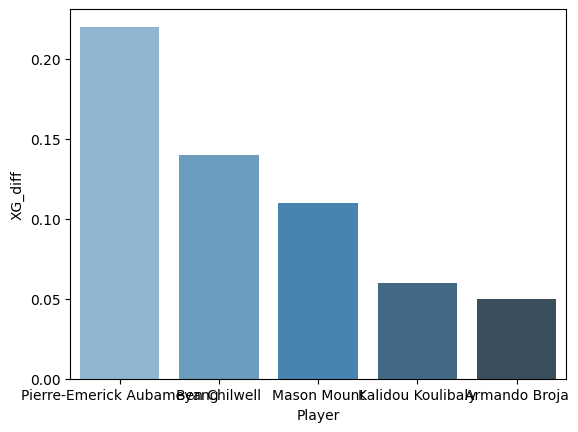

In [5]:
uA = df.sort_values('XG_diff', axis=0, ascending=False)[["Player", "XG_diff"]]

sns.barplot(x='Player', y='XG_diff', data=uA[:5], palette='Blues_d')
sns.set_title("A Bar chart showoing Chelsea 2022/23's top 5 players with the highest performing goalscorer, based on xG difference")
sns.set_xlabel("Player")
sns.set_ylabel("xG difference")